## H1 - Existiu alguma disciplina que foi ministrada Sábado à noite?

In [29]:
# Imports
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.pyplot import figure

In [30]:
#Cabeçalho
cabecalho = ['SIAPE','NIVEL','ANO_PERIODO','COD_DISCI','NOME_DISCI','CARGA_HR','HORARIOS']
#Abrindo o arquivo csv como Data Frame no Pandas
df = pd.read_csv("horarios_ufersa.csv", header=None,names=cabecalho, sep=',')

#Pega o resultado de todas as disciplinas ministradas no sábado à noite!
sabado = df[(df['HORARIOS'] == '7N1234') | (df['HORARIOS'] == '7N12') | (df['HORARIOS'] == '7N34')]

In [31]:
pd.value_counts(sabado['HORARIOS'])

7N1234    12
7N12       6
7N34       2
Name: HORARIOS, dtype: int64

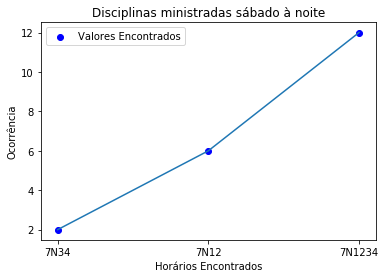

In [32]:
"""
x = Horários
y = Número de vezes que ocorreu esse determinado horário
"""

x = ["7N34", "7N12", "7N1234"]
y = [2,6,12]

titulo = "Disciplinas ministradas sábado à noite"
eixox = "Horários Encontrados"
eixoy = "Ocorrência"

#Legendas
plt.title(titulo)
plt.xlabel(eixox)
plt.ylabel(eixoy)


plt.scatter(x, y, label = "Valores Encontrados", color = "b")
plt.legend()
plt.plot(x, y)
plt.show()

## H2-  Existem horários que ocorrem com maior frequência?

In [33]:
"""
Utilizei pd.value_counts(df['HORARIOS'])
Salvei em um arquivo csv: df.to_csv('Horarios.csv')
"""
#Cabeçalho do arquivo
cabecalho2 = ['HORARIOS','OCORRÊNCIA']

# Abrindo arquivo csv como DataFrame no Pandas
df2 = pd.read_csv("Horarios.csv", header=None, names=cabecalho2, sep=',')

In [34]:
"""
Como o número de dados é muito extenso (1842 linhas)
irei usar só os 5 primeiros resultados.

Obs: Tive difificuldade em regular esse índice
por isso escrevi o resultado nos vetores HR = Horários
e OCO = Ocorrência

"""
# df2
df2.head()

,HORARIOS,OCORRÊNCIA
0,24N12,509
1,3N34 5N12,452
2,24T23,399
3,6N1234,340
4,25N34,309


<BarContainer object of 5 artists>

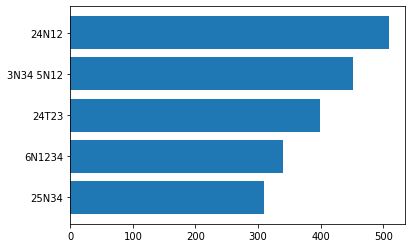

In [35]:

HR = ["25N34","6N1234","24T23","3N34 5N12","24N12"]
OCO = [309,340,399,452,509]




fig, ax = plt.subplots()
ax.barh(HR , OCO)

## Comparando o número de aulas no sábado à com os horários que ocorrem com maior frequência

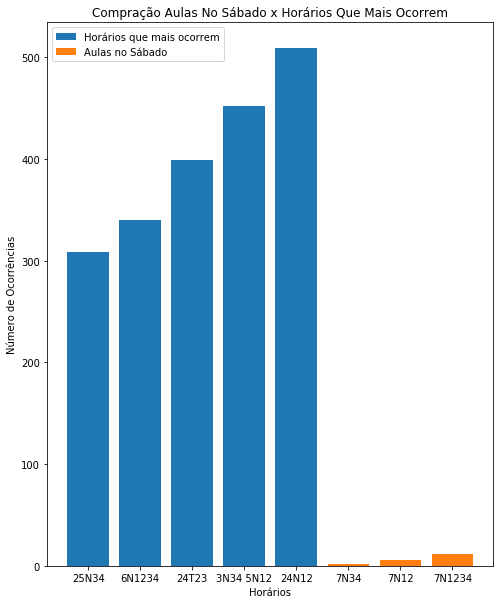

In [36]:

plt.figure(figsize=(8,10))
titulo = "Compração Aulas No Sábado x Horários Que Mais Ocorrem"
eixox = "Horários"
eixoy = "Número de Ocorrências"

#Legendas
plt.title(titulo)
plt.xlabel(eixox)
plt.ylabel(eixoy)

#Gráfico de barra.
plt.bar(HR, OCO, label = "Horários que mais ocorrem")
plt.bar(x, y, label = "Aulas no Sábado")
plt.legend()
plt.show()


## H3 - Em qual ano entre 2015.1 a 2018.2 foi ofertado o maior número de disciplinas?

In [38]:
df3 = df[(df['ANO_PERIODO'] >= 2015.1) & (df['COD_DISCI']) & (df['ANO_PERIODO'] <= 2018.2)]

pd.value_counts(df3['ANO_PERIODO'])

2018.2    2285
2018.1    2256
2017.2    2032
2017.1    1892
2016.2    1802
2016.1    1577
2015.2    1552
2015.1    1494
2015.3      16
2015.4       5
2016.3       4
2017.3       1
2017.4       1
2016.4       1
Name: ANO_PERIODO, dtype: int64

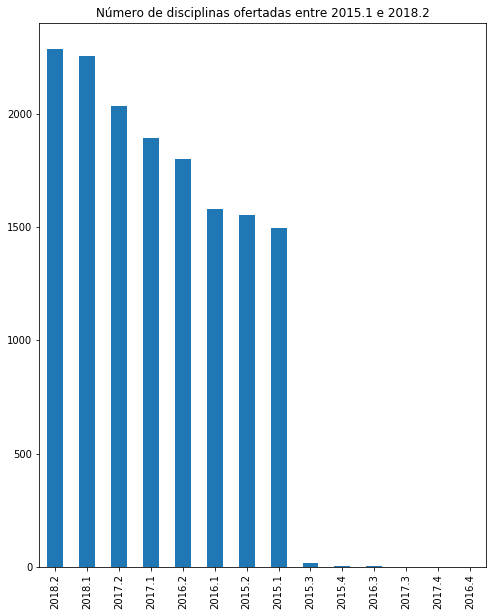

In [39]:
plt.figure(figsize=(8,10))
pd.value_counts(df3['ANO_PERIODO']).plot.bar(title='Número de disciplinas ofertadas entre 2015.1 e 2018.2')

## H4 - Existem mais disciplinas de 60H ou de 30H entre o período de 2007.1 e 2018.2?


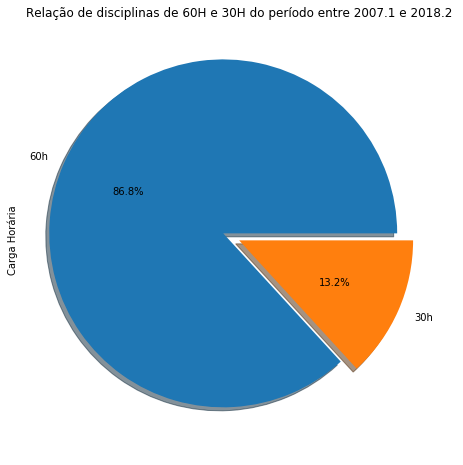

In [40]:
df4 = df[(df['ANO_PERIODO']>= 2007.1) & (df['ANO_PERIODO']<= 2018.2) & (df['CARGA_HR'] == '60h') | (df['CARGA_HR'] == '30h')]
pd.value_counts(df4['CARGA_HR']).plot.pie(title='Relação de disciplinas de 60H e 30H do período entre 2007.1 e 2018.2', label='Carga Horária', shadow=True, explode=(0.1,0),autopct='%.1f%%', figsize=(8, 8))

In [41]:
pd.value_counts(df4['CARGA_HR'])

60h    19552
30h     2972
Name: CARGA_HR, dtype: int64

## H5 - Qual a relação de turmas oferecidas a graduação e a pós-graduação no periodo de 2007. 1 a 2018.2?

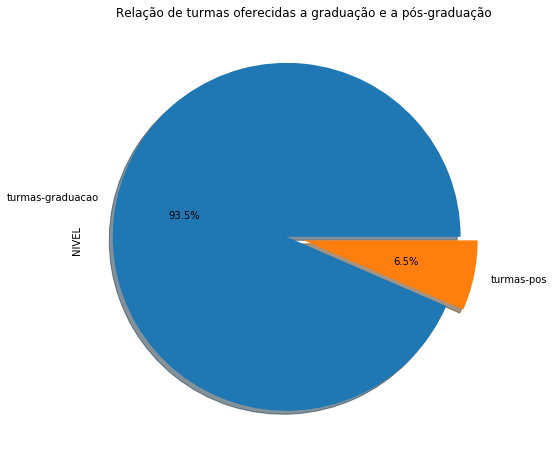

In [42]:
df5 = df[(df['ANO_PERIODO']>= 2007.1) & (df['ANO_PERIODO']<= 2018.2)]
pd.value_counts(df5['NIVEL']).plot.pie(title='Relação de turmas oferecidas a graduação e a pós-graduação', shadow=True, explode=(0.1,0),autopct='%.1f%%', figsize=(8, 8))

In [43]:
pd.value_counts(df5['NIVEL'])

turmas-graduacao    23997
turmas-pos           1673
Name: NIVEL, dtype: int64

## Relação de turmas oferecidas a graduação e a pós-graduação no periodo de 2018.1 a 2018.2

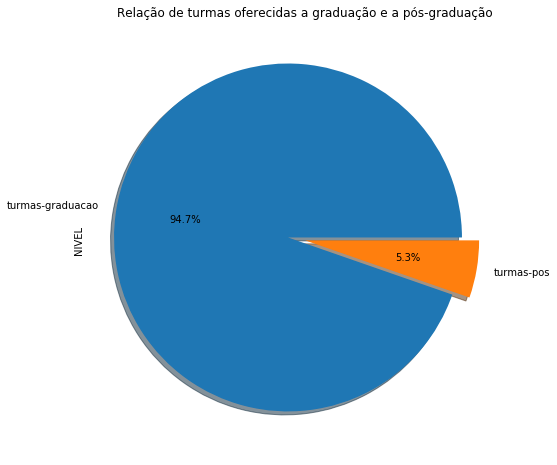

In [44]:
df5 = df[(df['ANO_PERIODO']>= 2018.1) & (df['ANO_PERIODO']<= 2018.2)]
pd.value_counts(df5['NIVEL']).plot.pie(title='Relação de turmas oferecidas a graduação e a pós-graduação', shadow=True, explode=(0.1,0),autopct='%.1f%%', figsize=(8, 8))

In [45]:
pd.value_counts(df5['NIVEL'])

turmas-graduacao    4299
turmas-pos           242
Name: NIVEL, dtype: int64

## H6 - Há a posibilidade do departamento de Ciências humanas do campus Angicos ter o maior número de professores dentre todos os campus da UFERSA?

In [46]:
cabecalho3 = ['SIAPE','NOME','DEPARTAMENTO','LINK_FT','LINK_PERFIL']
df6 = pd.read_csv("professors_information.csv", header=None,names=cabecalho3, sep=',')

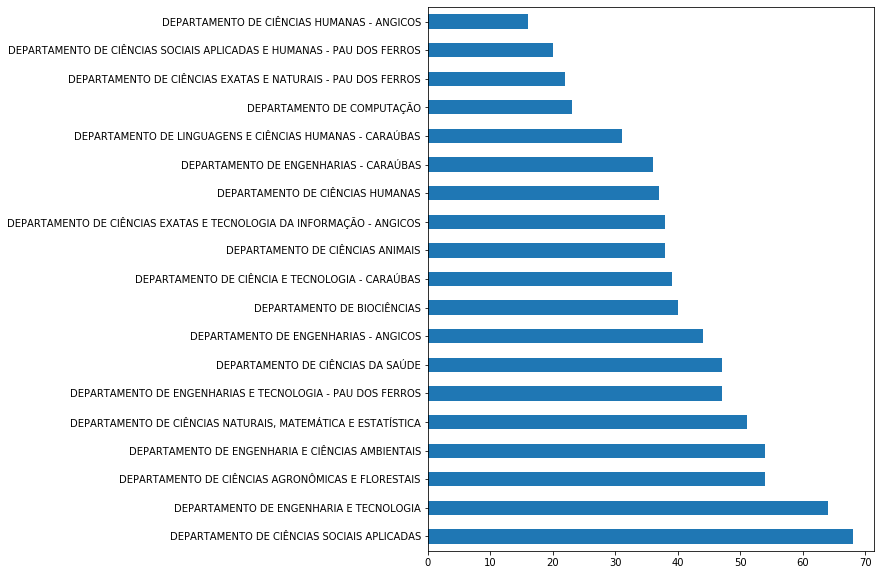

In [15]:
plt.figure(figsize=(8,10))
dp = df6['NOME']
pd.value_counts(df6['DEPARTAMENTO']).plot.barh()

In [16]:
pd.value_counts(df6['DEPARTAMENTO'])

DEPARTAMENTO DE CIÊNCIAS SOCIAIS APLICADAS                               68
DEPARTAMENTO DE ENGENHARIA E TECNOLOGIA                                  64
DEPARTAMENTO DE CIÊNCIAS AGRONÔMICAS E FLORESTAIS                        54
DEPARTAMENTO DE ENGENHARIA E CIÊNCIAS AMBIENTAIS                         54
DEPARTAMENTO DE CIÊNCIAS NATURAIS, MATEMÁTICA E ESTATÍSTICA              51
DEPARTAMENTO DE ENGENHARIAS E TECNOLOGIA - PAU DOS FERROS                47
DEPARTAMENTO DE CIÊNCIAS DA SAÚDE                                        47
DEPARTAMENTO DE ENGENHARIAS - ANGICOS                                    44
DEPARTAMENTO DE BIOCIÊNCIAS                                              40
DEPARTAMENTO DE CIÊNCIA E TECNOLOGIA - CARAÚBAS                          39
DEPARTAMENTO DE CIÊNCIAS ANIMAIS                                         38
DEPARTAMENTO DE CIÊNCIAS EXATAS E TECNOLOGIA DA INFORMAÇÃO - ANGICOS     38
DEPARTAMENTO DE CIÊNCIAS HUMANAS                                         37
DEPARTAMENTO

## H7 - Existem disciplinas ministradas pelo professor ARAKEN DE MEDEIROS SANTOS?

In [51]:

"""
O SIAPE do professor também não se encontra na base de dados. 
O número SIAPE foi retirado da página: https://sigaa.ufersa.edu.br/sigaa/public/docente/portal.jsf?siape=1631848
"""
#Pegando o SIAPE do professor
df7 = df6[(df6['SIAPE'] == 1631848) | (df6['NOME'] == 'ARAKEN DE MEDEIROS SANTOS')]
df7


,SIAPE,NOME,DEPARTAMENTO,LINK_FT,LINK_PERFIL


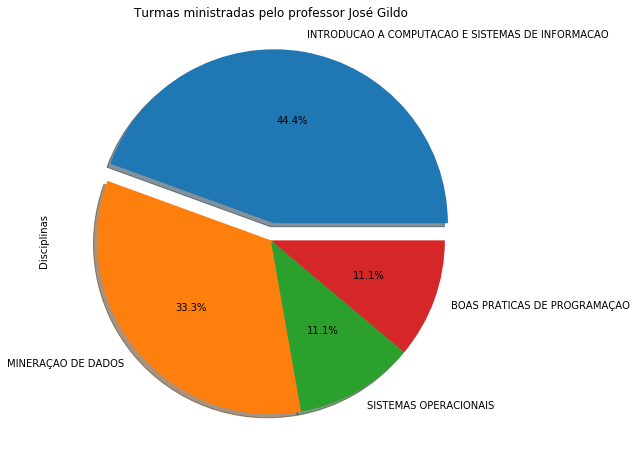

In [56]:
# Teste com o professor Jose Gildo
#df8 = df6[(df6['NOME'] == 'JOSE GILDO DE ARAUJO JUNIOR')]
#int(df8['SIAPE'])

df_h8 = df[(df['SIAPE'] == 2400142)]
pd.value_counts(df_h8['NOME_DISCI']).plot.pie(title='Turmas ministradas pelo professor José Gildo', shadow=True, explode=(0.1,0 ,0 ,0), label = 'Disciplinas',autopct='%.1f%%', figsize=(8, 8))